<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

### analysing dataset

In [2]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


### filtering dataset
The task requires focusing on movies made in the 1990s

In [4]:
netflix_df_filter = netflix_df[(netflix_df["type"]=="Movie") & (netflix_df["release_year"]<2000) &( netflix_df["release_year"]>=1990)]

### getting average time of movies

In [5]:
#statistics_df=netflix_df.describe()
#duration=statistics_df.loc[["mean"],["duration"]]
#print(duration)
duration = int(netflix_df_filter.loc[:,["duration"]].median())
print(duration)

108


### extracting movies less than 90 minutes

In [6]:
short_duration = 90
short_duration_netflix_df = netflix_df_filter[(netflix_df["duration"]<short_duration)]
short_duration_action_netflix_df = short_duration_netflix_df[(netflix_df["genre"] =="Action")] 
print(len(short_duration_netflix_df))
print(len(netflix_df))

34
4812


### counting movies less than 90 minutes

In [7]:
short_movie_count = len(short_duration_action_netflix_df)
print(short_movie_count)

7


### Creating special plots
giving a special value for each type of genre

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### first fixing genre labels

In [9]:
def rearrange_genre(genre):
    if genre.startswith('TV '):
        return genre[3:] + ' TV'  # Remove 'TV ' and append ' TV' at the end
    else:
        return genre

In [10]:
netflix_df['genre'] = netflix_df['genre'].apply(rearrange_genre)

### giving unique colour for each genre

In [11]:
unique_genres = netflix_df['genre'].unique()
colors = sns.color_palette('hsv', len(sorted(unique_genres)))
genre_color_map = dict(zip(sorted(unique_genres), colors))

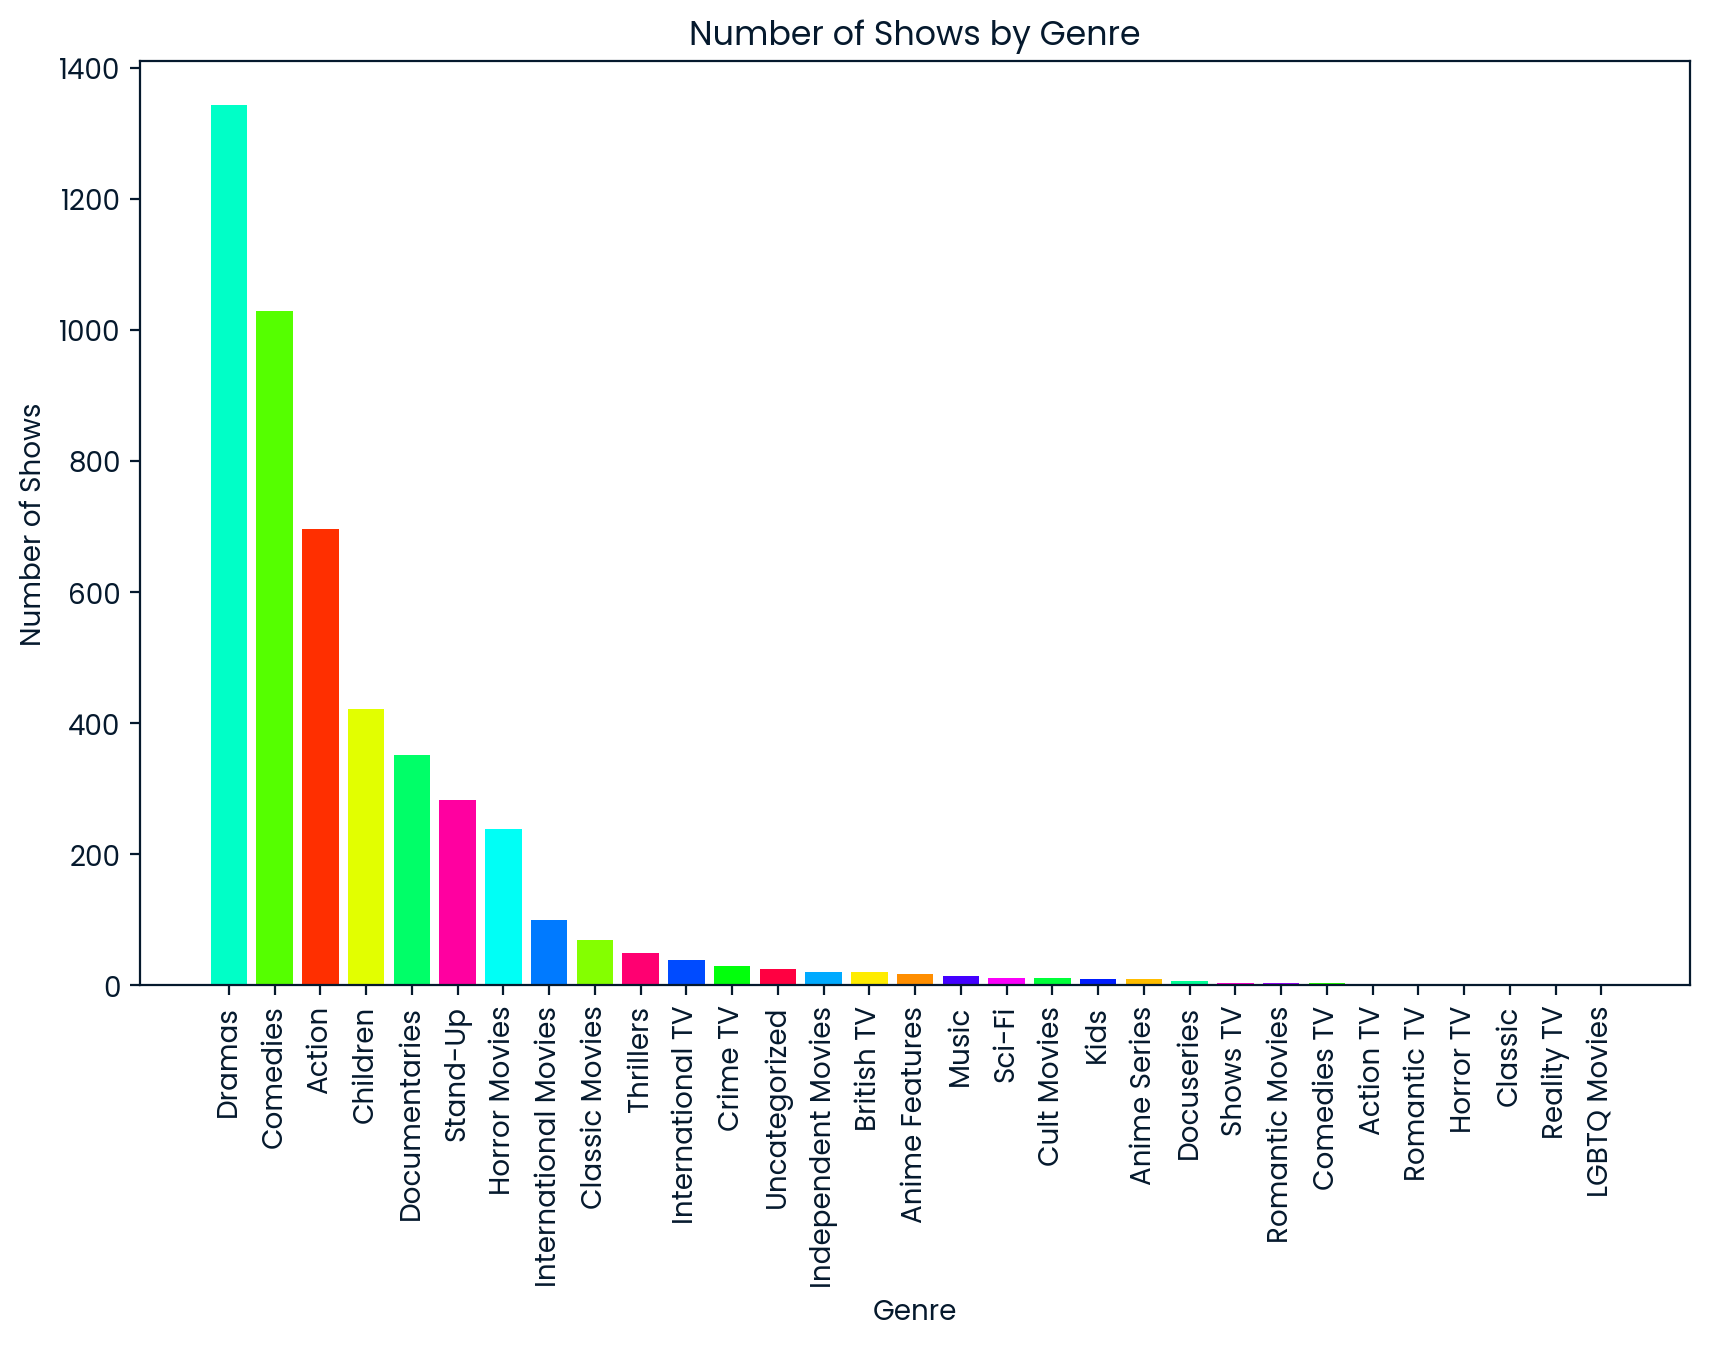

In [12]:
# Count the number of shows per genre
genre_counts = netflix_df['genre'].value_counts()

# Create a bar plot with assigned colors
plt.figure(figsize=(10, 6))
bars = plt.bar(genre_counts.index, genre_counts.values, color=[genre_color_map[genre] for genre in genre_counts.index])

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Number of Shows')
plt.title('Number of Shows by Genre')
plt.xticks(rotation=90)
plt.show()

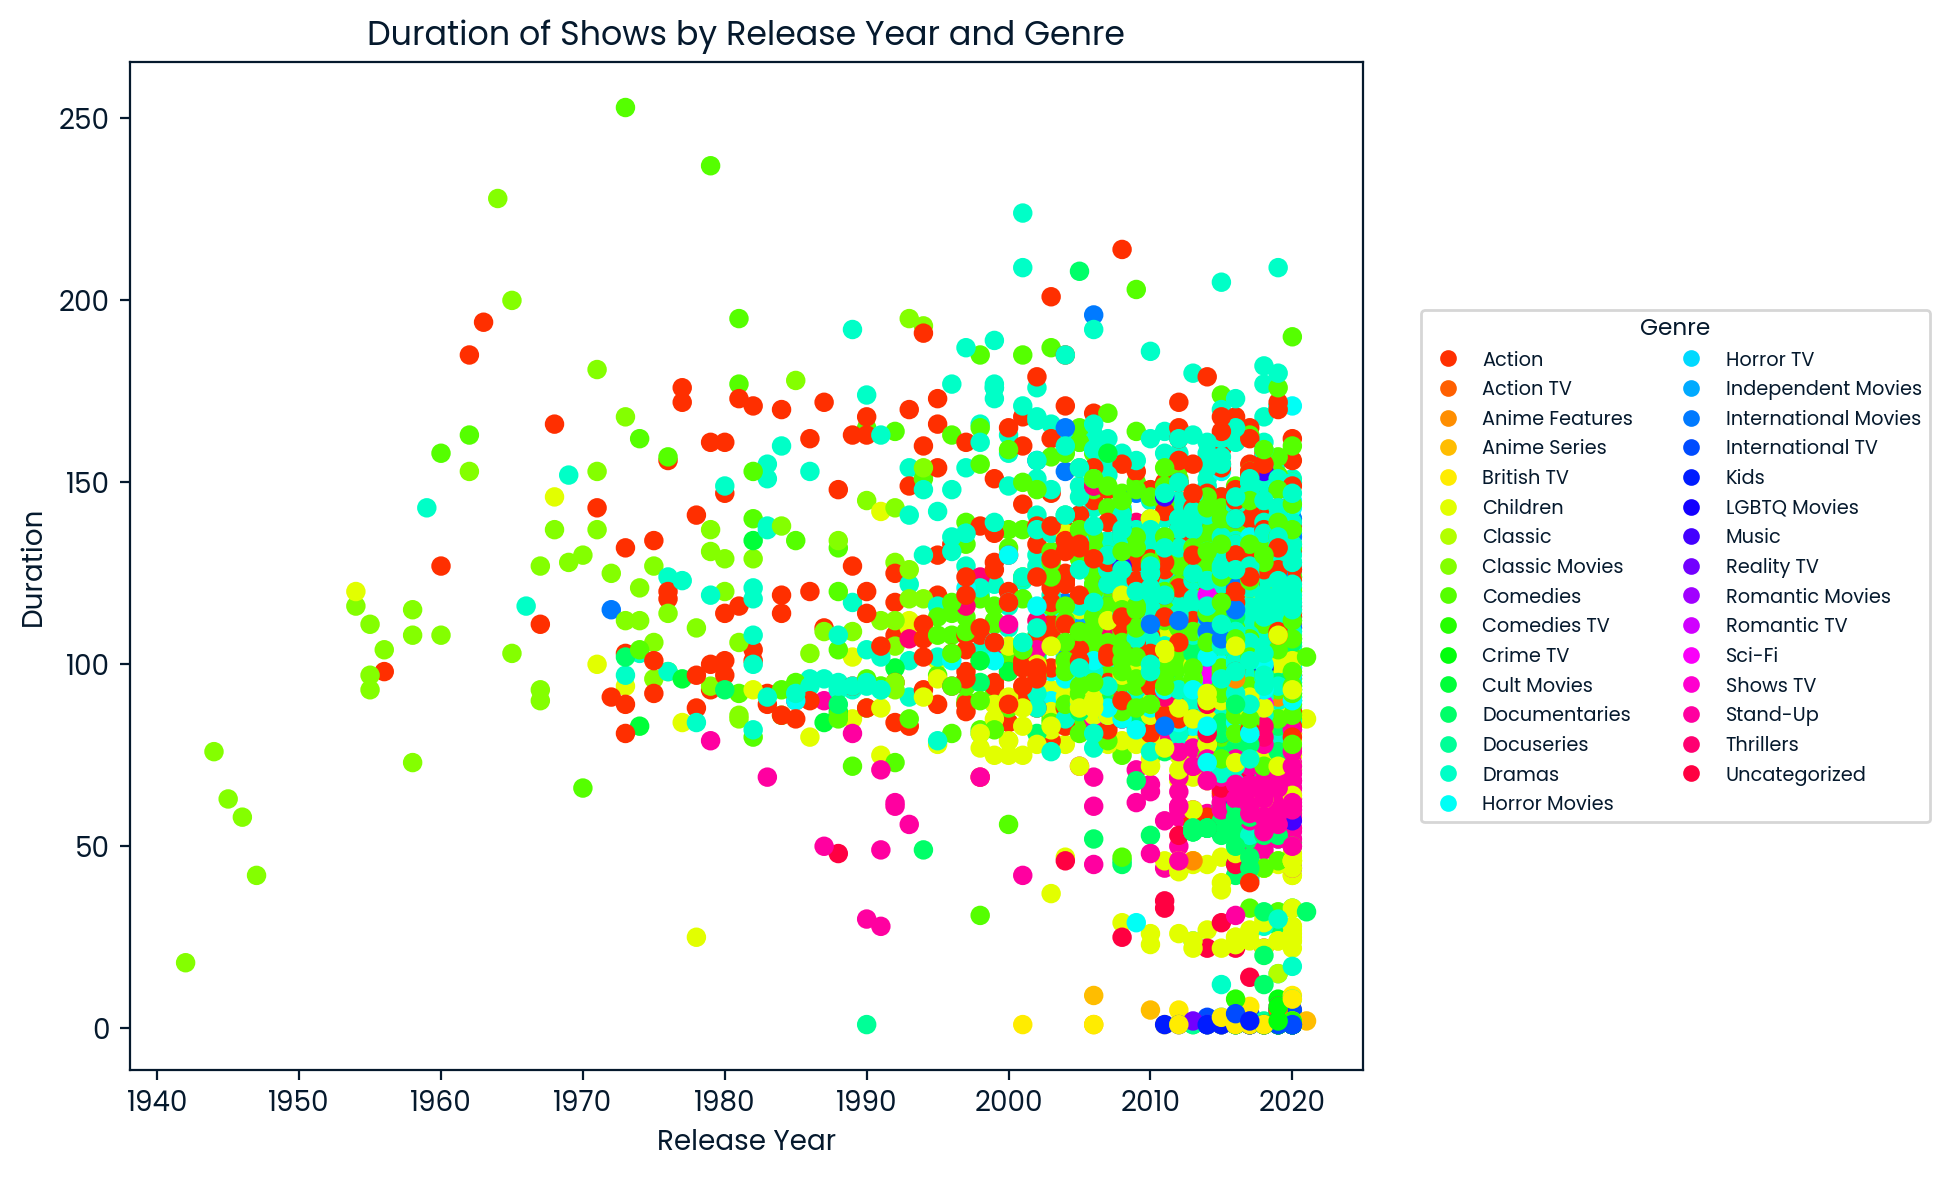

In [13]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Create the figure and two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6), gridspec_kw={'width_ratios': [3, 1]})

# Create the scatter plot on the left (ax1)
sc = ax1.scatter(netflix_df['release_year'], netflix_df['duration'], c=netflix_df['genre'].map(genre_color_map))

# Add labels and title to the scatter plot
ax1.set_xlabel('Release Year')
ax1.set_ylabel('Duration')
ax1.set_title('Duration of Shows by Release Year and Genre')

# Remove axis from the second plot (ax2) which will contain only the legend
ax2.axis('off')

# Create a custom legend with small circular markers
legend_handles = [mlines.Line2D([], [], color=genre_color_map[genre], marker='o', linestyle='', markersize=5, label=genre) for genre in genre_color_map]

# Add the legend to the second subplot (ax2) in two columns
ax2.legend(handles=legend_handles, title='Genre', fontsize='x-small', title_fontsize='small', loc='center', ncol=2)

# Adjust layout to ensure the subplots are properly spaced
plt.tight_layout()

# Show the figure
plt.show()


### Viewing the amount of genre produce for each year 

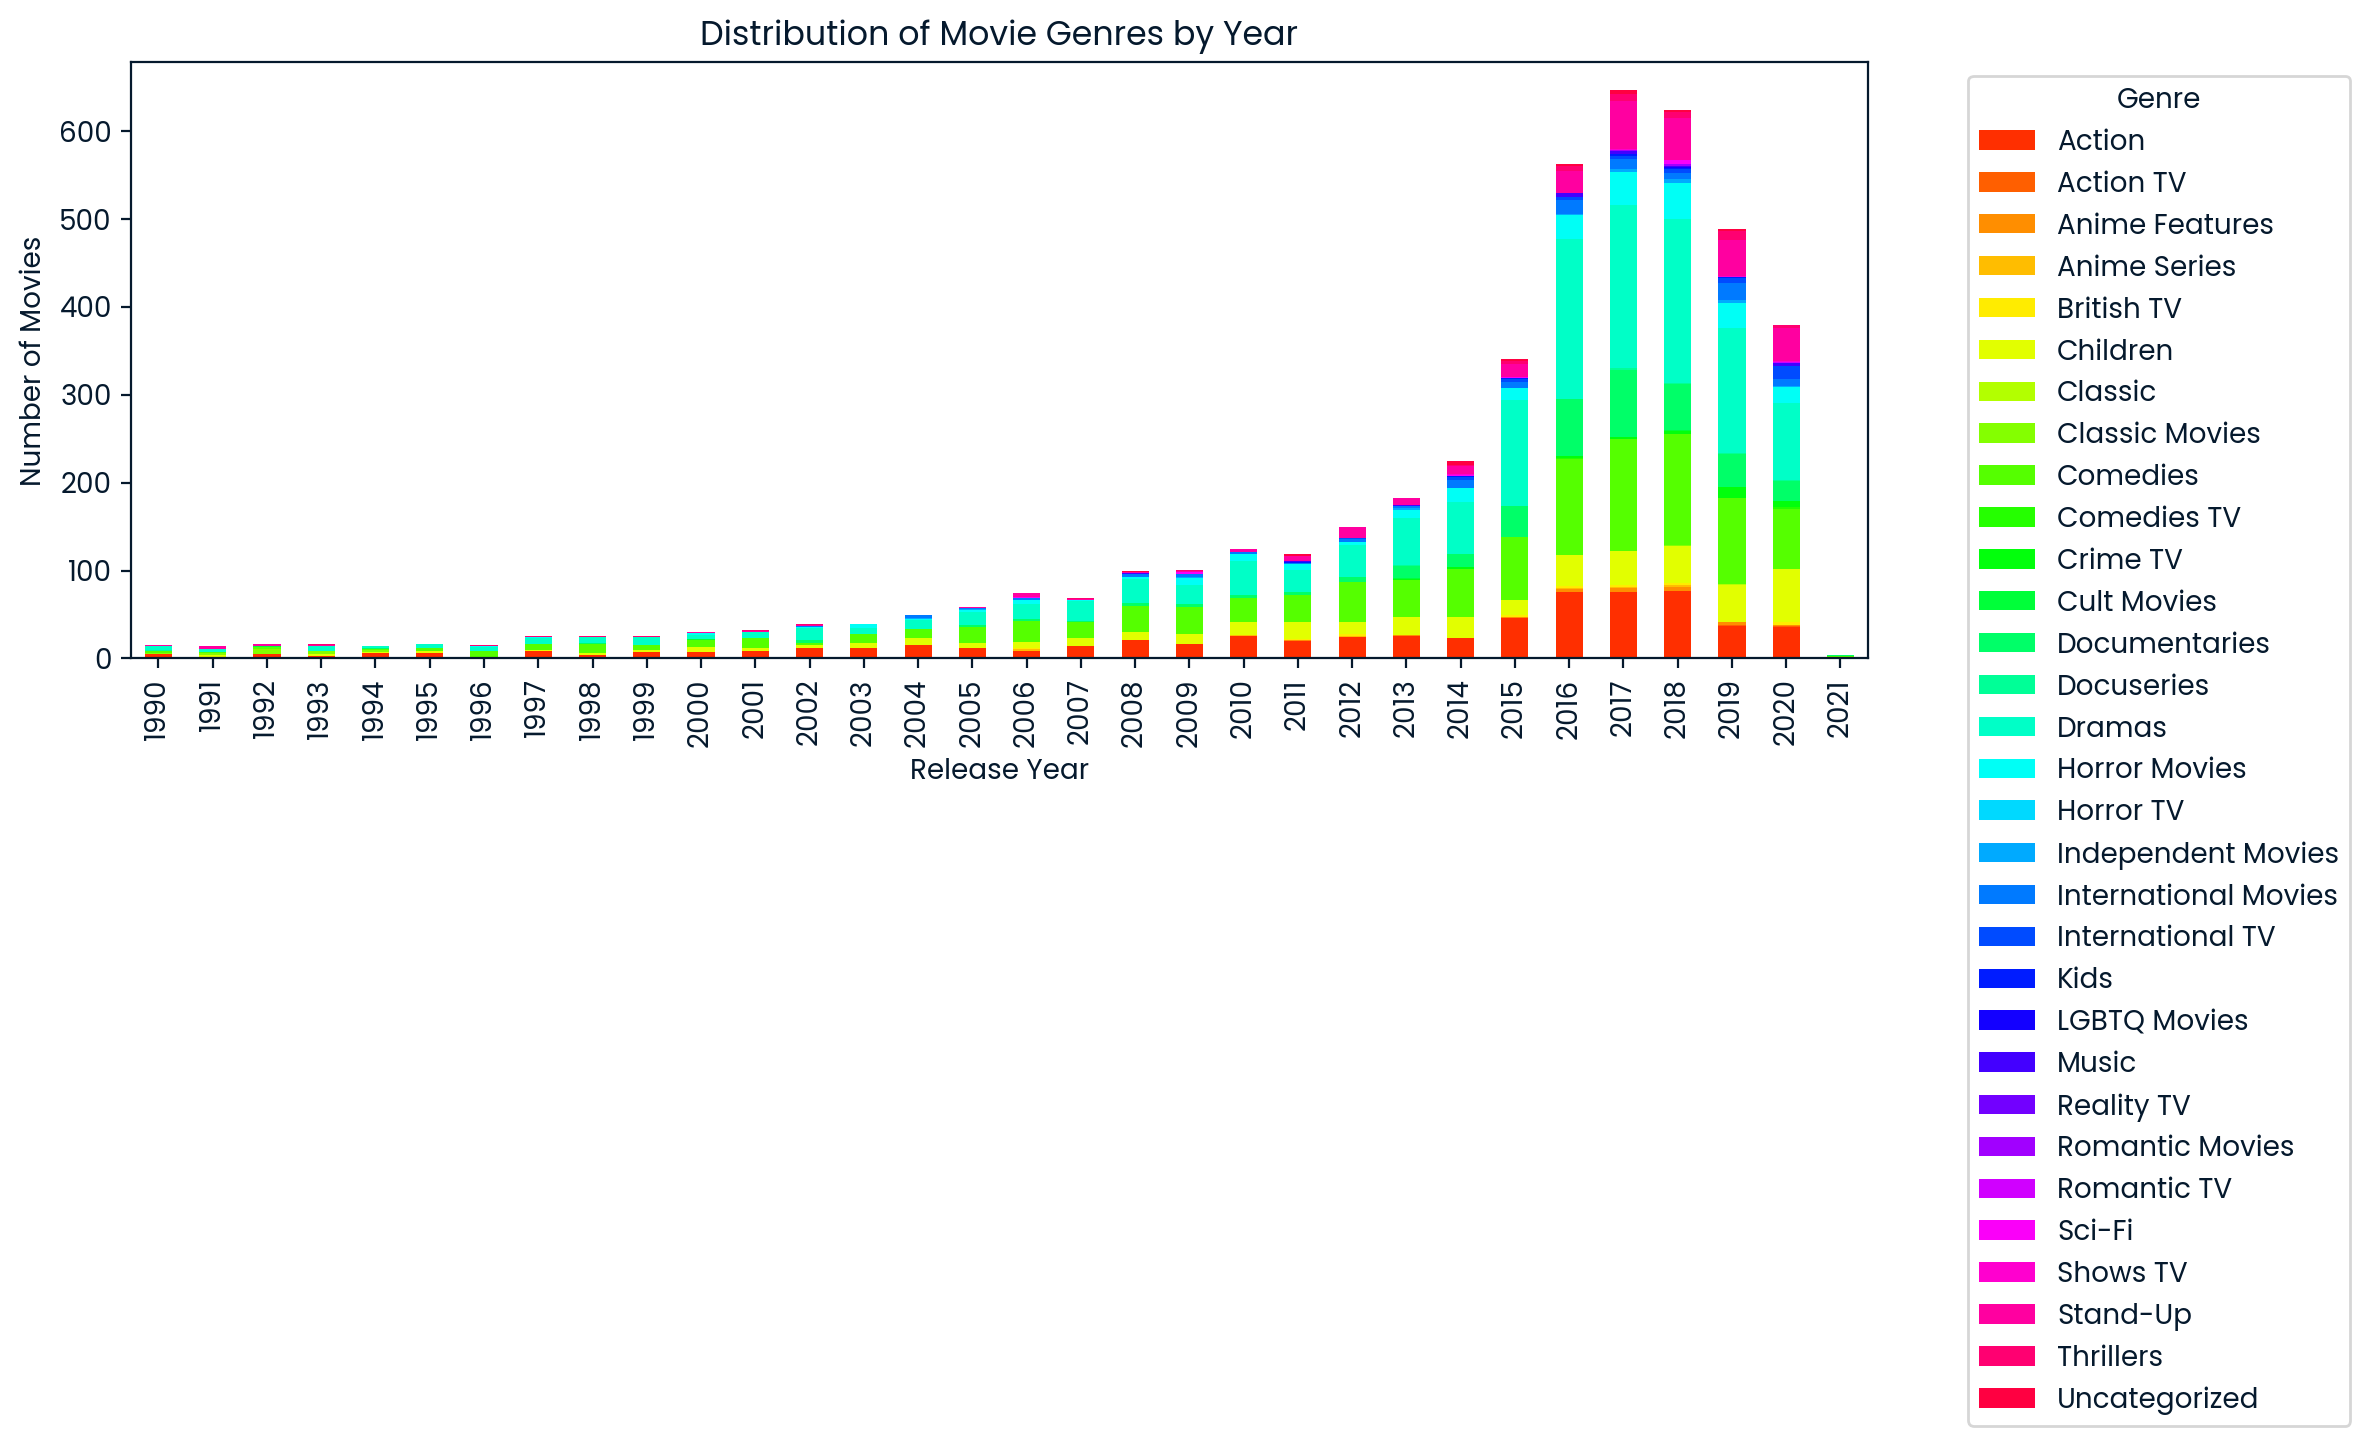

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Netflix Data (replace this with your actual DataFrame)
# netflix_df = pd.read_csv('netflix_data.csv')
filter_netflix_df = netflix_df[netflix_df['release_year']>=1990]
# Group the data by release year and genre, and count the number of occurrences
grouped_df = filter_netflix_df.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Create a color map for the genres
colors = [genre_color_map[genre] for genre in grouped_df.columns]

# Create the stacked bar chart
grouped_df.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Genres by Year')

# Add a legend for the genres
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


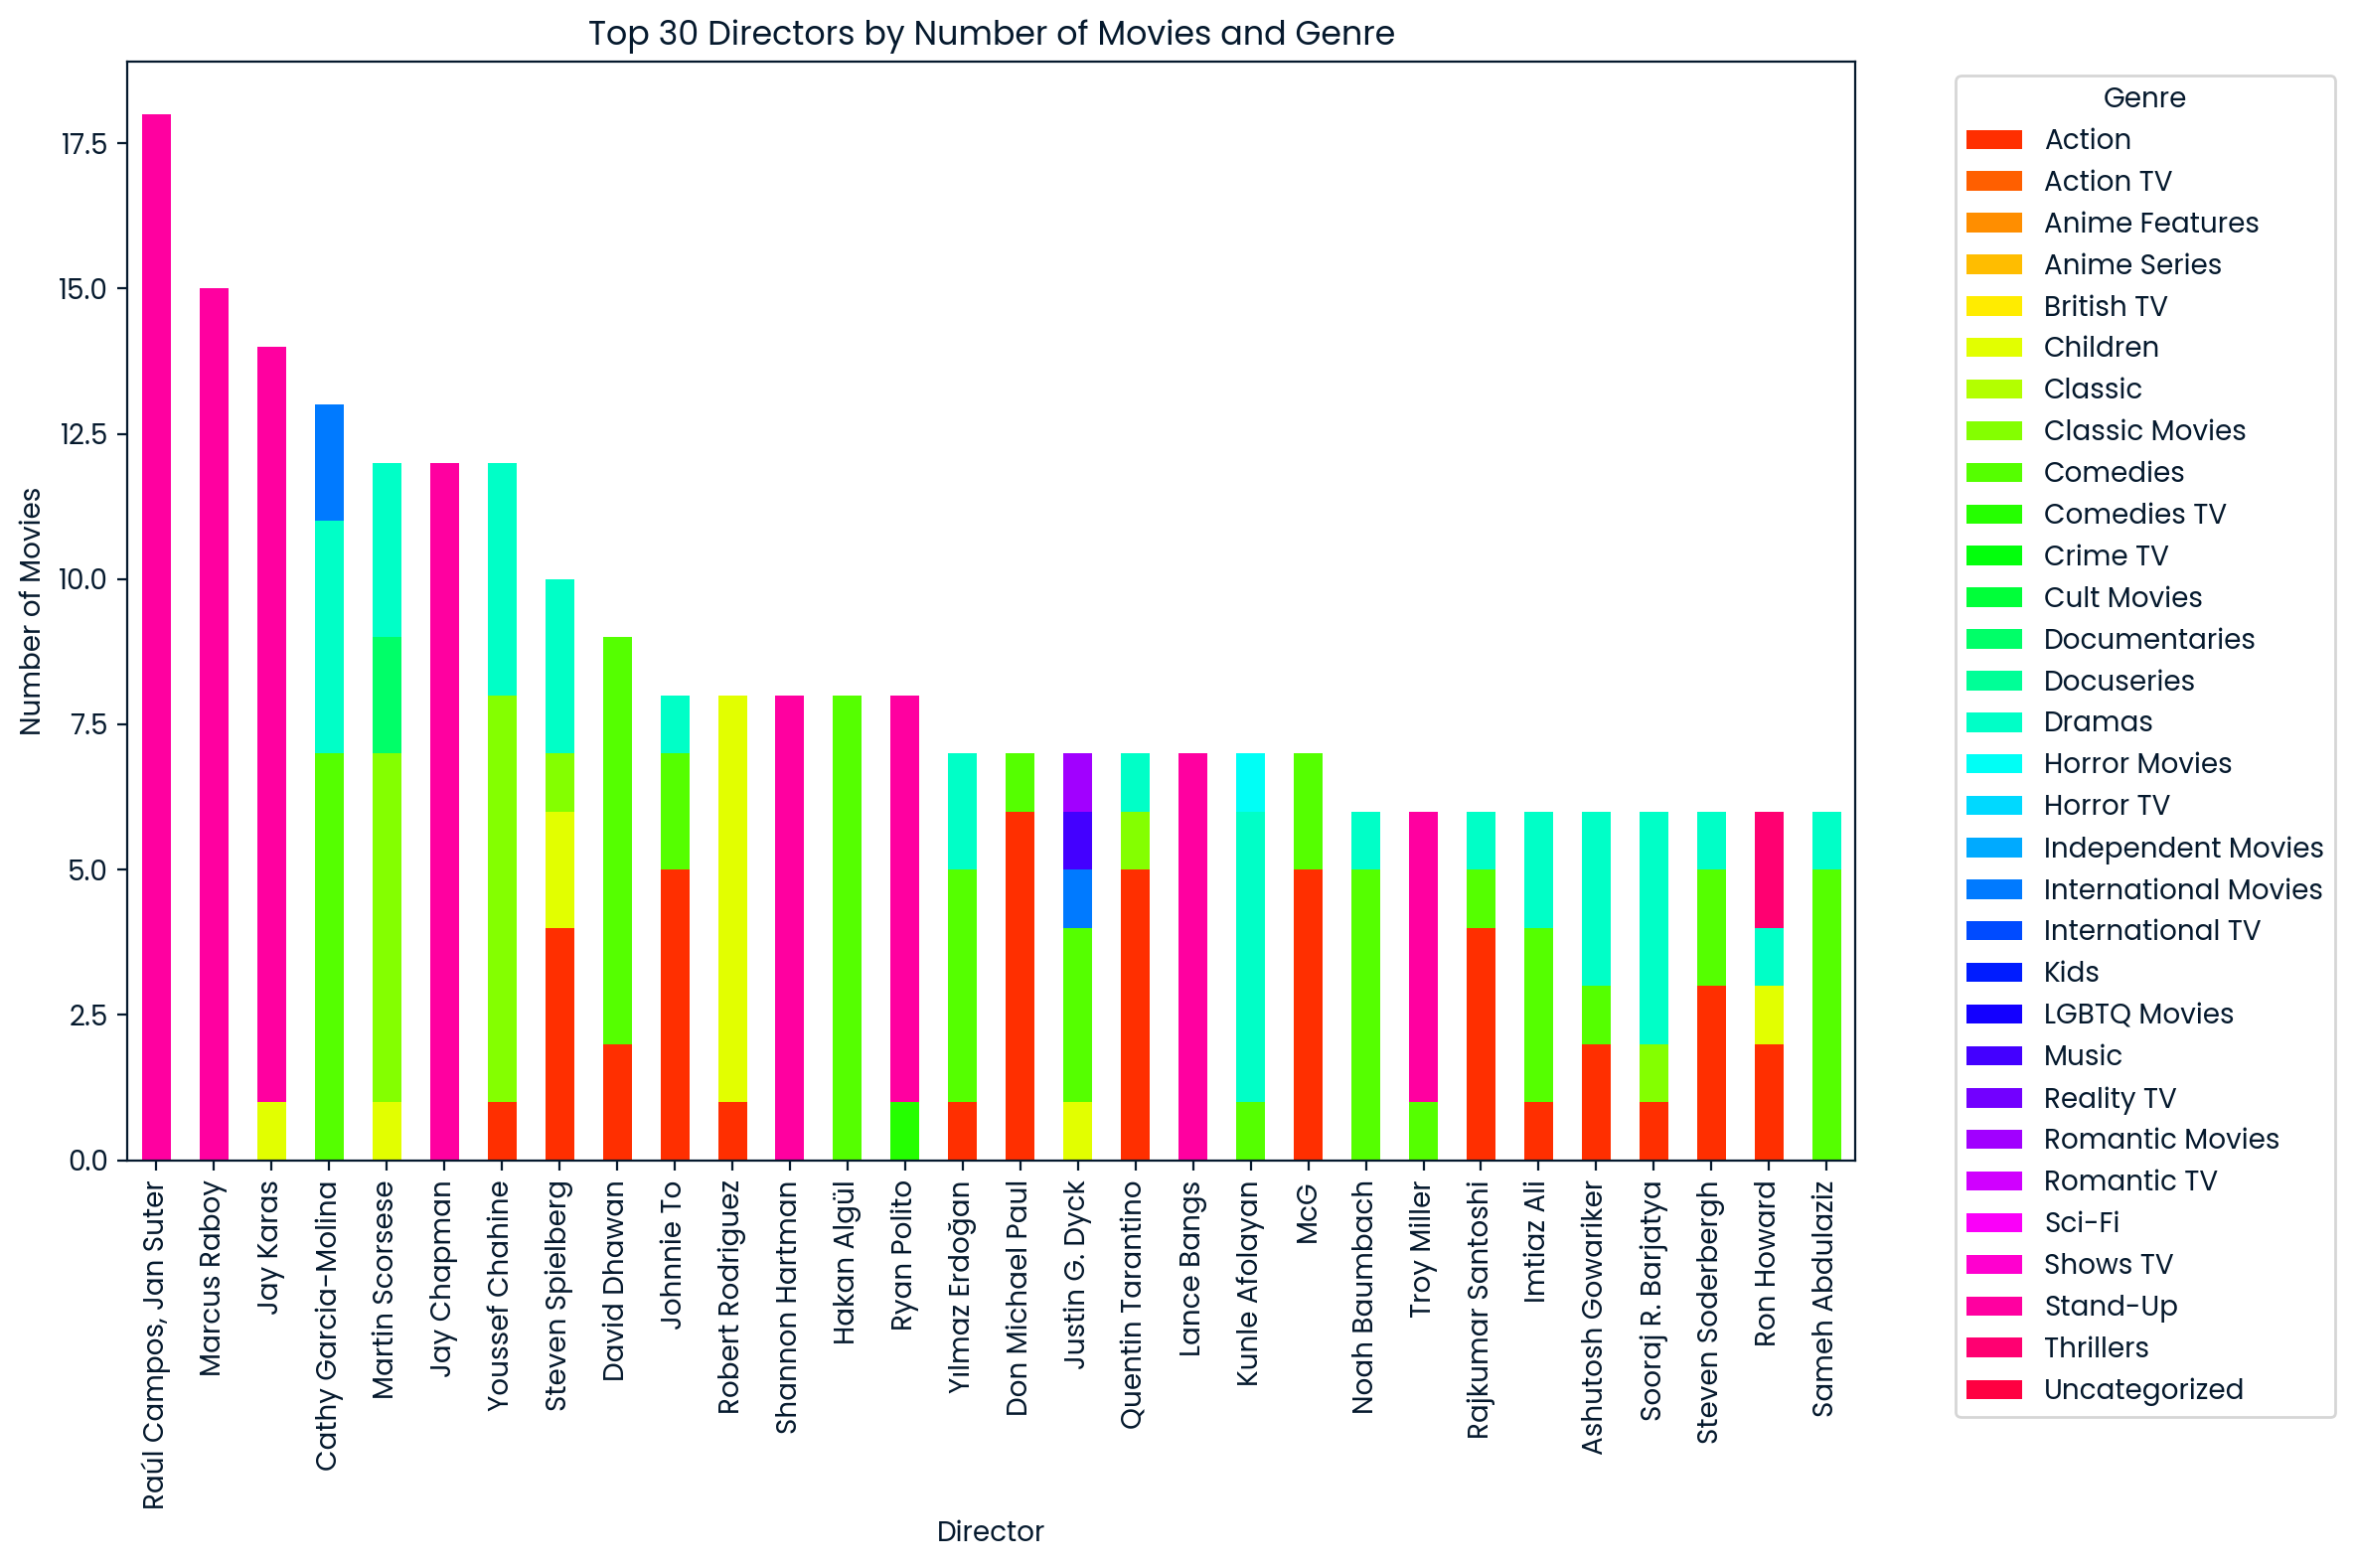

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample Netflix Data (replace with your actual DataFrame)
# netflix_df = pd.read_csv('netflix_data.csv')

# Group the data by director and genre, and count the number of movies for each
director_genre_counts = netflix_df.groupby(['director', 'genre']).size().unstack(fill_value=0)

# Calculate the total number of movies per director and sort to get the top 30 directors
top_directors = director_genre_counts.sum(axis=1).sort_values(ascending=False).head(30)

# Filter the original director-genre DataFrame to include only the top 30 directors
top_director_genre_counts = director_genre_counts.loc[top_directors.index]

# Create a color map for the genres
colors = [genre_color_map[genre] for genre in top_director_genre_counts.columns]

# Create the stacked bar chart for the top 30 directors
top_director_genre_counts.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))

# Add labels and title
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.title('Top 30 Directors by Number of Movies and Genre')

# Add a legend for the genres
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


# Building AI model for duration prediction
Importing necessary libraries.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

### filter dataset for what is relevant

In [17]:
# Filter to include only movies released after 1990
movies_df = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] > 1990)]

# Select the features (release_year, genre, director) and target (duration in minutes)
X = movies_df[['release_year', 'genre', 'director']]
y = movies_df['duration']

### One hot encode for release year, genre and director

In [19]:
# One-hot encode release_year, genre, and director
encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

### Spliting Dataset to train, valid and test datasets

In [20]:
# Split the data into training (70%), validation (20%), and test sets (10%)
X_train, X_temp, y_train, y_temp = train_test_split(X_encoded, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)  

In [23]:
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


### Create model and train it

In [29]:
# Train a Gradient Boosting Regressor model to see the progression of training
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01, random_state=42)


In [30]:
# Initialize a list to store validation errors
validation_errors = []

In [31]:
# Train the model in stages and monitor progress
for n_estimators in range(1, 501, 10):  # Increase the number of trees in steps of 10
    model.set_params(n_estimators=n_estimators)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred_valid = model.predict(X_valid)
    
    # Calculate and store the Mean Absolute Error on the validation set
    mae_valid = mean_absolute_error(y_valid, y_pred_valid)
    validation_errors.append(mae_valid)

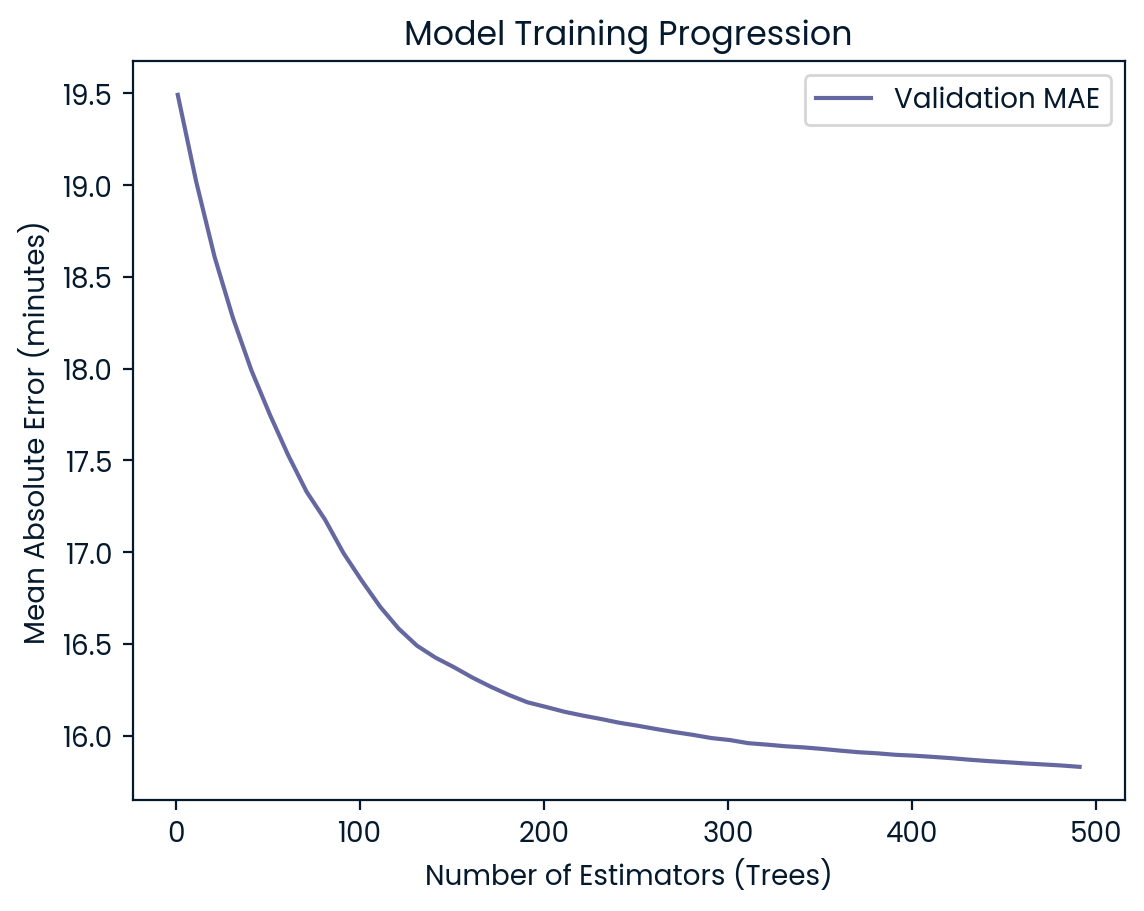

In [32]:
# Plot the validation MAE progression
plt.plot(range(1, 501, 10), validation_errors, label='Validation MAE')
plt.xlabel('Number of Estimators (Trees)')
plt.ylabel('Mean Absolute Error (minutes)')
plt.title('Model Training Progression')
plt.legend()
plt.show()

In [33]:
# Final evaluation on the test set
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Final Mean Absolute Error on Test Set: {mae_test} minutes')

Final Mean Absolute Error on Test Set: 15.396716281015124 minutes


### Creating a NN model using pytorch
Importing necessary packages

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Splitting the dataset

In [18]:
# Filter to include only movies released after 1990
movies_df = netflix_df[(netflix_df['type'] == 'Movie') & (netflix_df['release_year'] > 1990)]

# Select the features (release_year, genre, director) and target (duration in minutes)
X = movies_df[['release_year', 'genre', 'director']]
y = movies_df['duration']

# Separate numerical and categorical features
numerical_features = ['release_year']
categorical_features = ['genre', 'director']

# Split the data first
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Normalize numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_valid_num = scaler.transform(X_valid[numerical_features])
X_test_num = scaler.transform(X_test[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_valid_cat = encoder.transform(X_valid[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])

# Combine numerical and categorical features
X_train = np.hstack([X_train_num, X_train_cat])
X_valid = np.hstack([X_valid_num, X_valid_cat])
X_test = np.hstack([X_test_num, X_test_cat])

y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
y_valid = y_valid.to_numpy() if isinstance(y_valid, pd.Series) else y_valid
y_test = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test

### Defining Pytorch Dataset

In [19]:
# Define a PyTorch Dataset
class MovieDurationDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


### Declaraing Dataset

In [20]:
# Create datasets and dataloaders
train_dataset = MovieDurationDataset(X_train, y_train)
valid_dataset = MovieDurationDataset(X_valid, y_valid)
test_dataset = MovieDurationDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## Building and defining the NN model

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class MovieDurationNN(nn.Module):
    def __init__(self, input_size):
        super(MovieDurationNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.5)

        self.fc2 = nn.Linear(512, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.5)

        self.fc3 = nn.Linear(256, 128)
        self.bn3 = nn.BatchNorm1d(128)
        self.dropout3 = nn.Dropout(0.5)

        self.fc4 = nn.Linear(128, 64)
        self.bn4 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.5)

        self.fc5 = nn.Linear(64, 32)
        self.bn5 = nn.BatchNorm1d(32)
        self.dropout5 = nn.Dropout(0.5)

        self.fc6 = nn.Linear(32, 16)
        self.bn6 = nn.BatchNorm1d(16)
        self.dropout6 = nn.Dropout(0.5)

        self.fc7 = nn.Linear(16, 1)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = F.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = F.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        x = F.relu(self.bn4(self.fc4(x)))
        x = self.dropout4(x)

        x = F.relu(self.bn5(self.fc5(x)))
        x = self.dropout5(x)

        x = F.relu(self.bn6(self.fc6(x)))
        x = self.dropout6(x)

        x = self.fc7(x)
        return x.squeeze()


### Declaring the model, loss function and optimizer

In [22]:
# Instantiate the model
input_size = X_train.shape[1]  # 3431 features from one-hot encoding
model = MovieDurationNN(input_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)



### building function for training and visualisation of the process

In [23]:
%matplotlib widget

In [24]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch
import copy 

def train_model_with_live_plot(model, train_loader, valid_loader, criterion, optimizer, num_epochs=20):
    # Initialize lists to store the training and validation losses
    train_losses = []
    valid_losses = []

    # Initialize variables to track the best model
    best_model_wts = copy.deepcopy(model.state_dict())
    best_epoch = 0
    best_valid_loss = float('inf')

    # Create the figure and axes outside the loop
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Training and Validation Loss Over Epochs')
    ax.grid(True)
    ax.legend()
    plt.close(fig)  # Prevents duplicate display

    # Initialize the lines to be updated
    train_line, = ax.plot([], [], label='Training Loss')
    valid_line, = ax.plot([], [], label='Validation Loss')

    for epoch in range(num_epochs):
        # Training step
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs.squeeze(), targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            train_loss += loss.item() * inputs.size(0)

        # Average train loss for the epoch
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation step
        model.eval()
        valid_loss = 0.0
        with torch.no_grad():
            for inputs, targets in valid_loader:
                outputs = model(inputs)
                loss = criterion(outputs.squeeze(), targets)
                valid_loss += loss.item() * inputs.size(0)

        # Average validation loss for the epoch
        valid_loss /= len(valid_loader.dataset)
        valid_losses.append(valid_loss)

        # Check if this is the best model so far
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            best_epoch = epoch + 1  # Epochs are zero-indexed
            best_model_wts = copy.deepcopy(model.state_dict())

        # Clear the current output
        clear_output(wait=True)

        # Update the data in the lines
        x_data = range(1, epoch+2)
        train_line.set_data(x_data, train_losses)
        valid_line.set_data(x_data, valid_losses)

        # Adjust the axes limits
        ax.set_xlim(1, num_epochs)
        y_min = min(train_losses + valid_losses)
        y_max = max(train_losses + valid_losses)
        ax.set_ylim(y_min - 0.1*(y_max - y_min), y_max + 0.1*(y_max - y_min))

        # Redraw the plot
        # display(fig)  # Uncomment if you want to display the plot in each epoch
        # fig.canvas.draw()
        # fig.canvas.flush_events()

        # Print epoch statistics
        print(f'Epoch {epoch+1}/{num_epochs}')
        print(f'Training Loss: {train_loss:.4f}')
        print(f'Validation Loss: {valid_loss:.4f}')
        print(f'Best Validation Loss so far: {best_valid_loss:.4f} at epoch {best_epoch}')

    # Load the best model weights after training
    model.load_state_dict(best_model_wts)

    # After training is complete, show the final plot
    clear_output(wait=True)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
    ax.plot(range(1, num_epochs+1), valid_losses, label='Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Final Training and Validation Loss Over Epochs')
    ax.legend()
    ax.grid(True)
    plt.show()

    print(f'\nTraining complete. Best Validation Loss: {best_valid_loss:.4f} at epoch {best_epoch}')
    return model, train_losses, valid_losses


### Initiate training

Epoch 1/200
Training Loss: 10173.2467
Validation Loss: 10202.3906
Best Validation Loss so far: 10202.3906 at epoch 1
Epoch 2/200
Training Loss: 10036.4771
Validation Loss: 10081.5806
Best Validation Loss so far: 10081.5806 at epoch 2
Epoch 3/200
Training Loss: 9901.2161
Validation Loss: 9860.5984
Best Validation Loss so far: 9860.5984 at epoch 3
Epoch 4/200
Training Loss: 9762.0422
Validation Loss: 9671.1371
Best Validation Loss so far: 9671.1371 at epoch 4
Epoch 5/200
Training Loss: 9571.6177
Validation Loss: 9489.2898
Best Validation Loss so far: 9489.2898 at epoch 5
Epoch 6/200
Training Loss: 9404.8497
Validation Loss: 9281.6906
Best Validation Loss so far: 9281.6906 at epoch 6
Epoch 7/200
Training Loss: 9242.5835
Validation Loss: 8899.3783
Best Validation Loss so far: 8899.3783 at epoch 7
Epoch 8/200
Training Loss: 9016.0509
Validation Loss: 8730.9760
Best Validation Loss so far: 8730.9760 at epoch 8
Epoch 9/200
Training Loss: 8854.3446
Validation Loss: 8452.3543
Best Validation Lo

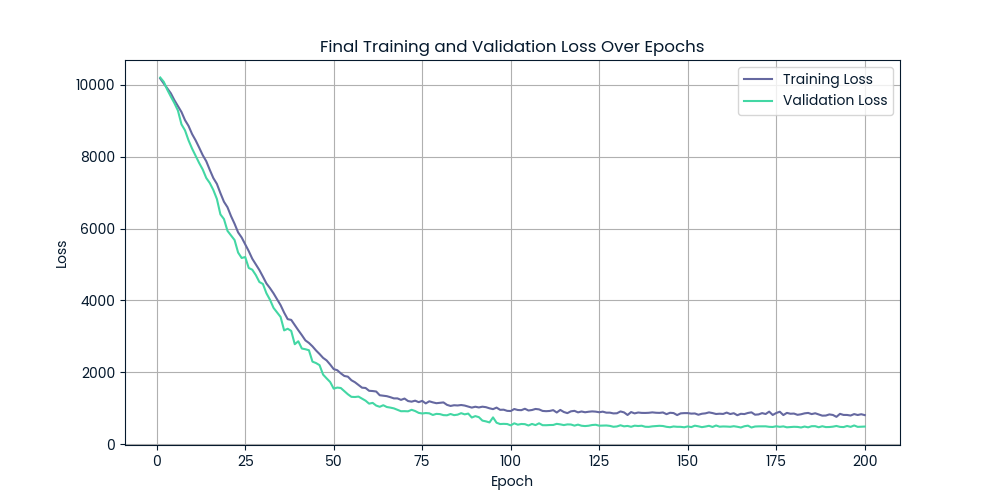


Training complete. Best Validation Loss: 463.5589 at epoch 168


In [26]:
model, train_losses, valid_losses = train_model_with_live_plot(
    model, train_loader, valid_loader, criterion, optimizer, num_epochs=200
)

### function for model evaluation and visualization 

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.metrics import mean_absolute_error

def evaluate_model_with_lines(model, test_loader):
    model.eval()
    predictions = []
    actuals = []
    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.squeeze().tolist())
            actuals.extend(targets.tolist())

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(actuals, predictions)
    print(f'Mean Absolute Error on Test Set: {mae:.2f} minutes')

    # Convert to numpy arrays for easier manipulation
    actuals = np.array(actuals)
    predictions = np.array(predictions)

    # Create a wider plot
    plt.figure(figsize=(15, 6))  # Adjusting the width of the figure for a wider display

    # Plot green dots for actual values and red dots for predicted values
    plt.scatter(range(len(actuals)), actuals, color='green', label='Actual Durations', s=30, alpha=0.7)
    plt.scatter(range(len(actuals)), predictions, color='red', label='Predicted Durations', s=30, alpha=0.7)

    # Draw lines connecting the actual and predicted values
    for i in range(len(actuals)):
        plt.plot([i, i], [actuals[i], predictions[i]], color='blue', alpha=0.3)  # Connecting lines (light blue)

    plt.xlabel('Samples')
    plt.ylabel('Duration (minutes)')
    plt.title('Actual vs Predicted Durations (Green = Actual, Red = Predicted)')
    plt.legend()
    plt.grid(True)
    plt.show()


Mean Absolute Error on Test Set: 14.24 minutes


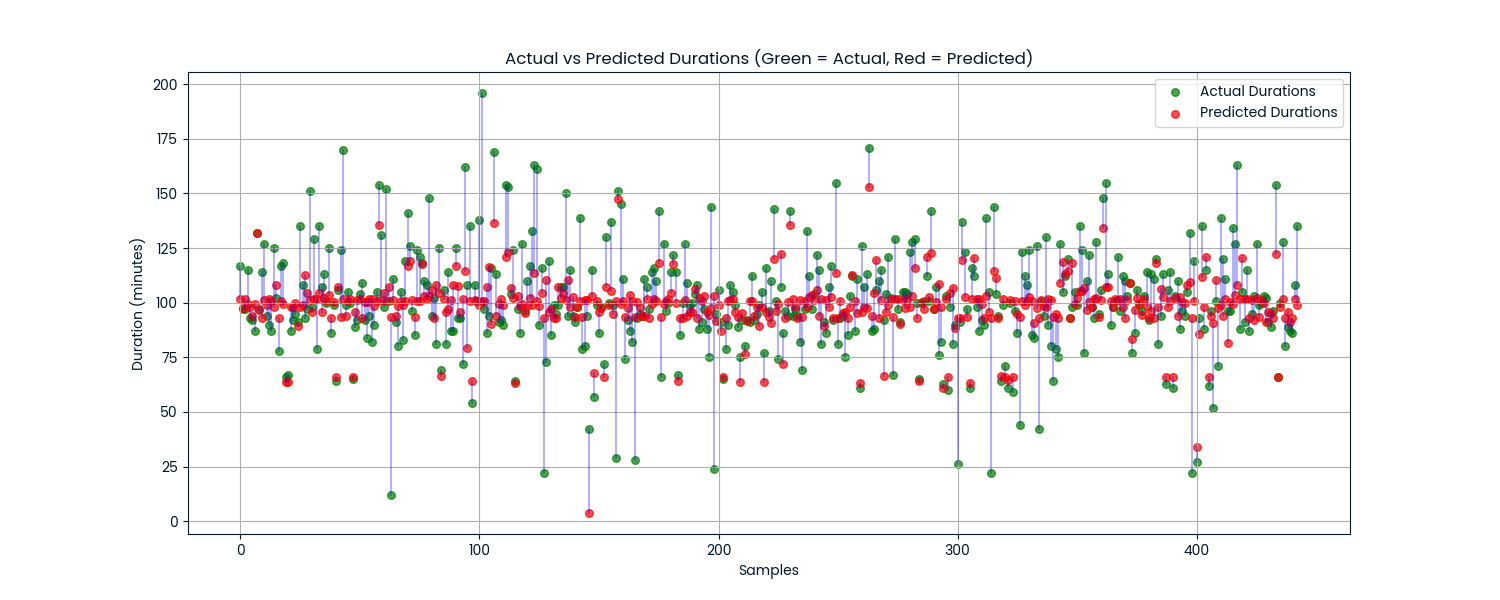

In [33]:
# Evaluate the model on the test set
evaluate_model_with_lines(model, test_loader)

In [34]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'movie_duration_model.pth')
print('Model saved as movie_duration_model.pth')

Model saved as movie_duration_model.pth
